In [1]:
# !pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 31.4 MB/s eta 0:00:0000:0100:01


In [1]:
import pymorphy3
import nltk

# Убедитесь, что необходимые ресурсы NLTK загружены
nltk.download('punkt')

# Открытие файла и чтение текста
with open('work/data/belkin.txt', "r", encoding="utf-8") as f:
    text = f.read()

# Токенизация текста
tokens = nltk.word_tokenize(text)

# Инициализация морфологического анализатора
morph = pymorphy3.MorphAnalyzer()

# Функция для проверки, является ли слово именем собственным
def is_proper_noun(word):
    parsed_word = morph.parse(word)[0]
    return 'Name' in parsed_word.tag

# Извлечение имен собственных
proper_nouns = [word for word in tokens if is_proper_noun(word)]

# Создание списка часто встречаемых слов
freq_dist = nltk.FreqDist(tokens)
common_words = [word for word, freq in freq_dist.items() if freq > 5]

# Удаление имен собственных из списка часто встречаемых слов
common_words_without_proper_nouns = [word for word in common_words if not is_proper_noun(word)]

# Выровнять длину списков, добавив None
max_len = max(len(proper_nouns), len(common_words_without_proper_nouns))
proper_nouns.extend([None] * (max_len - len(proper_nouns)))
common_words_without_proper_nouns.extend([None] * (max_len - len(common_words_without_proper_nouns)))

# Создание DataFrame из списков proper_nouns и common_words_without_proper_nouns
import pandas as pd
df = pd.DataFrame({
    'proper_nouns': proper_nouns,
    'common_words_without_proper_nouns': common_words_without_proper_nouns
})

# Печать результата
df.sample(12)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,proper_nouns,common_words_without_proper_nouns
420,Бетси,Муромский
371,верьхом,ехать
205,Петр,снова
329,Лиза,правда
210,Дуня,сказал
423,Лиза,Жаксон
416,Лизе,такой
346,Алексей,Ты
433,Лизавете,None
441,Григорий,None


In [3]:
df.sample(12)

,proper_nouns,common_words_without_proper_nouns
90,Владимира,первый
79,Ипсиланти,свою
303,Настей,там
224,Дуни,тот
344,Лиза,комнату
29,мел,Мы
97,Владимира,однажды
50,Сильвио,смерти
422,Алексей,мисс
102,Владимир,мною


In [2]:
import nltk
import pymorphy3
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Убедитесь, что необходимые ресурсы NLTK загружены
nltk.download('punkt')
nltk.download('stopwords')

# Открытие файла и чтение текста
with open('work/data/belkin.txt', "r", encoding="utf-8") as f:
    text = f.read()

# Токенизация текста
tokens = nltk.word_tokenize(text)

# Инициализация морфологического анализатора
morph = pymorphy3.MorphAnalyzer()

# Загрузка русских стоп-слов
from nltk.corpus import stopwords
russian_stopwords = set(stopwords.words('russian'))

# Пользовательские стоп-слова (можно добавить свои)
custom_stopwords = {'это', 'как', 'вот', 'так', 'когда', 'уже','и', 'в','это', 'с','это', 'нею','александр', 'лиза', 'сильвио', 'алексей', 'смотритель','всь','сказал','сказала','своей','своего',
 'сергеевич',
 'владимир',                         
 'пушкин',
 'повести',
 'покойного',
 'ивана',
 'петровича',
 'белкина',
 'гжа',
 'простакова',
 'то',
 'мой',
 'батюшка',
 'он',
 'еще',
 'сызмала',
 'к',
 'историям',
 'охотник',
 'скотинин'}

# Объединение стандартных и пользовательских стоп-слов
all_stopwords = russian_stopwords.union(custom_stopwords)

# Функция для проверки, является ли слово именем собственным
def is_proper_noun(word):
    parsed_word = morph.parse(word)[0]
    return 'Name' in parsed_word.tag

# Извлечение имен собственных
proper_nouns = [word for word in tokens if is_proper_noun(word)]

# Создание списка часто встречаемых слов
freq_dist = nltk.FreqDist(tokens)
common_words = [word for word, freq in freq_dist.items() if freq > 5]

# Удаление имен собственных и стоп-слов из списка часто встречаемых слов
common_words_without_proper_nouns = [
    word for word in common_words if not is_proper_noun(word) and word.lower() not in all_stopwords
]

# Выровнять длину списков, добавив None
max_len = max(len(proper_nouns), len(common_words_without_proper_nouns))
proper_nouns.extend([None] * (max_len - len(proper_nouns)))
common_words_without_proper_nouns.extend([None] * (max_len - len(common_words_without_proper_nouns)))

# Создание DataFrame из списков proper_nouns и common_words_without_proper_nouns
df = pd.DataFrame({
    'proper_nouns': proper_nouns,
    'common_words_without_proper_nouns': common_words_without_proper_nouns
})

# Печать результата
df.sample(12)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,proper_nouns,common_words_without_proper_nouns
26,Сильвио,родителей
41,Сильвио,двух
29,мел,Иванович
166,Марья,час
366,Лизе,None
418,Алексею,None
226,Дуня,такая
276,Алексея,None
319,Лиза,None
306,Лиза,None


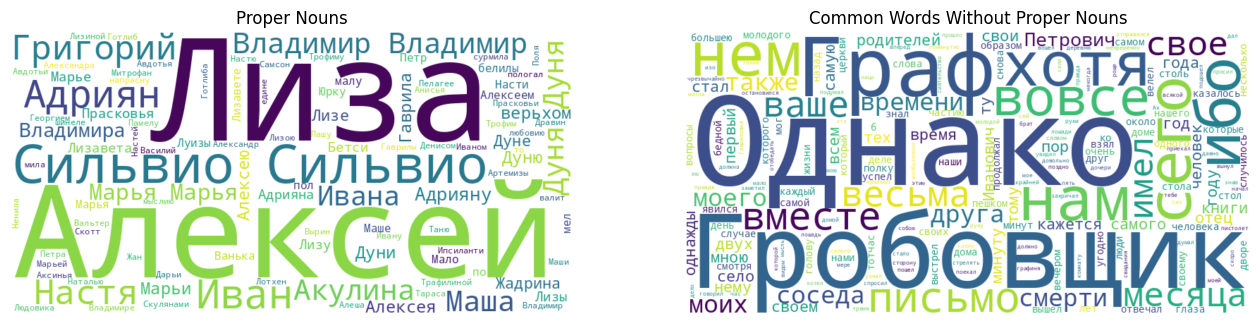

In [3]:
# Создание строк для wordcloud
proper_nouns_text = ' '.join([word for word in proper_nouns if word is not None])
common_words_text = ' '.join([word for word in common_words_without_proper_nouns if word is not None])

# Создание wordcloud для proper nouns
wordcloud_proper_nouns = WordCloud(width=800, height=400, background_color='white').generate(proper_nouns_text)

# Создание wordcloud для common words
wordcloud_common_words = WordCloud(width=800, height=400, background_color='white').generate(common_words_text)

# Визуализация wordclouds
plt.figure(figsize=(16, 8))

# Облако слов для имен собственных
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_proper_nouns, interpolation='bilinear')
plt.title('Proper Nouns')
plt.axis('off')

# Облако слов для частых слов без имен собственных
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_common_words, interpolation='bilinear')
plt.title('Common Words Without Proper Nouns')
plt.axis('off')

# Показать график
plt.show()